In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dlinputs import gopen, utils

In [183]:
import numpy as np
from scipy import ndimage as ndi
figsize(16, 16)
rc("image", cmap="gray")

In [4]:
data = gopen.open_source("/home/tmb/lpr-ocr/uw3-framed-lines.tgz")
sample = data.next()
utils.print_sample(sample)

__key__ 'A001BIN'
framed.png float32 (3300, 2592)
lines.png float32 (3300, 2592)


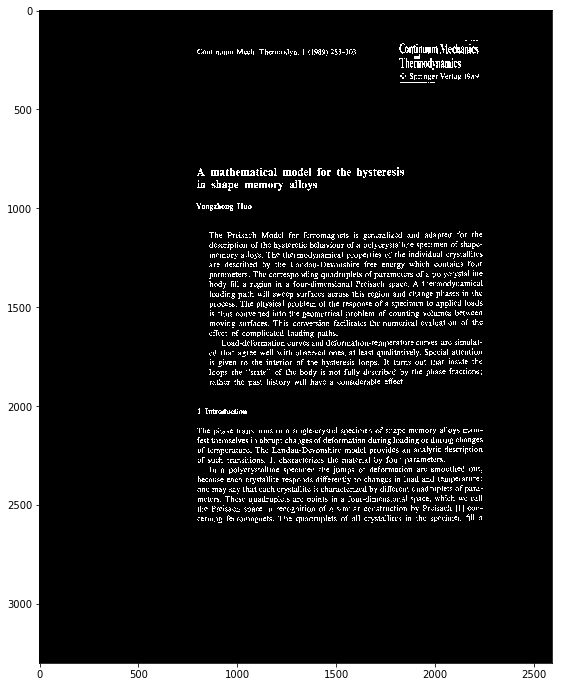

In [5]:
page = sample["framed.png"]
imshow(page)

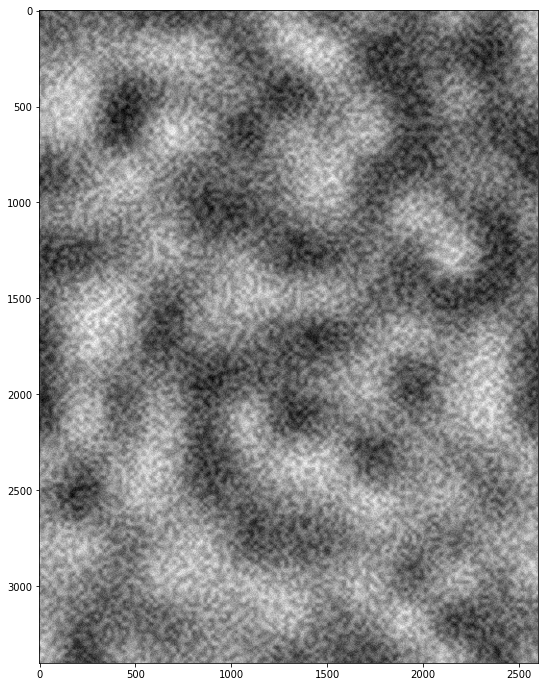

In [6]:
image = ndi.zoom(rand(17, 13), 200, order=2)
image += ndi.zoom(rand(170, 130), 20, order=2)*.5
image += ndi.zoom(rand(680, 520), 5, order=2)*.25
imshow(image)

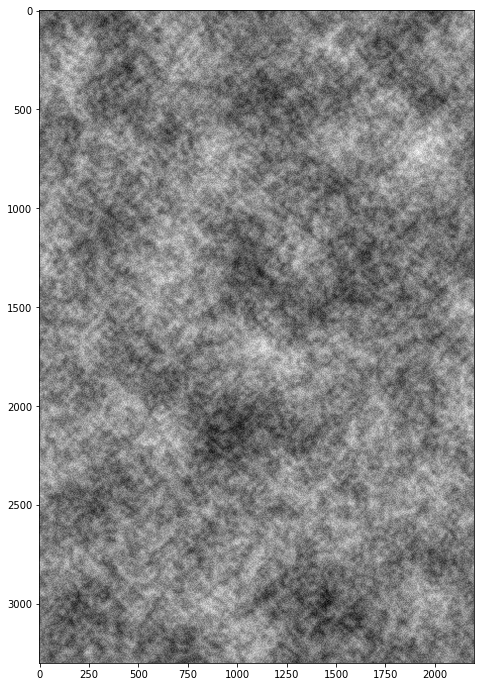

In [7]:
def make_at_scale(shape, scale):
    h, w = shape
    h0, w0 = int(h/scale+1), int(w/scale+1)
    data = rand(h0, w0)
    result = ndi.zoom(data, scale)
    return result[:h, :w]
def make_random(shape, lohi, scales, weights=None):
    if weights is None: weights = [1.0] * len(scales)
    result = make_at_scale(shape, scales[0]) * weights[0]
    for s, w in zip(scales, weights):
        result += make_at_scale(shape, s) * w
    lo, hi = lohi
    result -= amin(result)
    result /= amax(result)
    result *= (hi-lo)
    result += lo
    return result
imshow(make_random((3300, 2200), (0.0, 0.5), [200, 50, 20, 5])) 

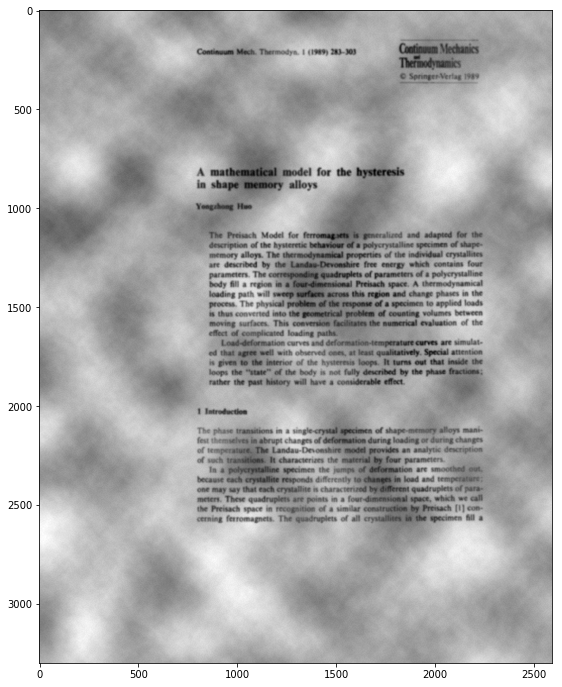

In [9]:
mask = ndi.gaussian_filter(page, 4.0)
mask /= amax(mask)
bg = make_random(page.shape, (0.0, 0.5), [200, 50, 20, 5], [1.0, 0.2, 0.1, 0.1])
fg = make_random(page.shape, (0.5, 1.0), [200, 50, 20, 5], [1.0, 0.2, 0.1, 0.1])
degraded = mask * bg + (1.0 - mask) * fg
imshow(degraded)

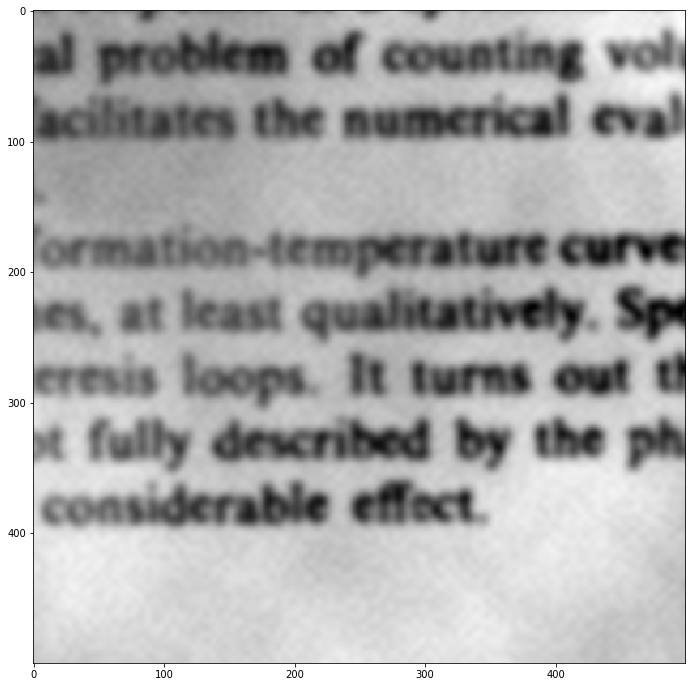

In [11]:
imshow(degraded[1500:2000, 1500:2000])

In [66]:
10**add.accumulate(rand(4))

array([ 1.62246888,  2.3733943 ,  4.13290916, 28.91653554])

In [191]:
def make_all_random(page):
    blur = 3.5 * rand()
    while 1:
        scales = add.accumulate(rand(4))
        scales = 10**scales
        if scales[-1] < 500: break
    weights = rand(4)
    mask = ndi.gaussian_filter(page, blur)
    mask /= amax(mask)
    sep = 0.2*rand()
    bg = make_random(page.shape, (0.0, 0.5-sep), scales, weights)
    fg = make_random(page.shape, (0.5+sep, 1.0), scales, weights)
    degraded = mask * bg + (1.0-mask) * fg
    lo, hi = 0.2 * rand(), 0.8 + 0.2*rand()
    params = dict(blur=blur, sep=sep, clip=(lo, hi), scales=scales, weights=weights)
    clipped = clip(degraded, lo, hi)
    clipped -= amin(clipped)
    clipped /= amax(clipped)
    return clipped, params

Text(0.5,1,"{'scales': array([ 1.25977876,  1.69805728,  3.24530299, 27.11849423]), 'blur': 1.9749460727919321, 'weights': array([0.07045524, 0.04809305, 0.51602897, 0.59888255]), 'clip': (0.0410779969526891, 0.9461258306212225), 'sep': 0.04614527155531563}")

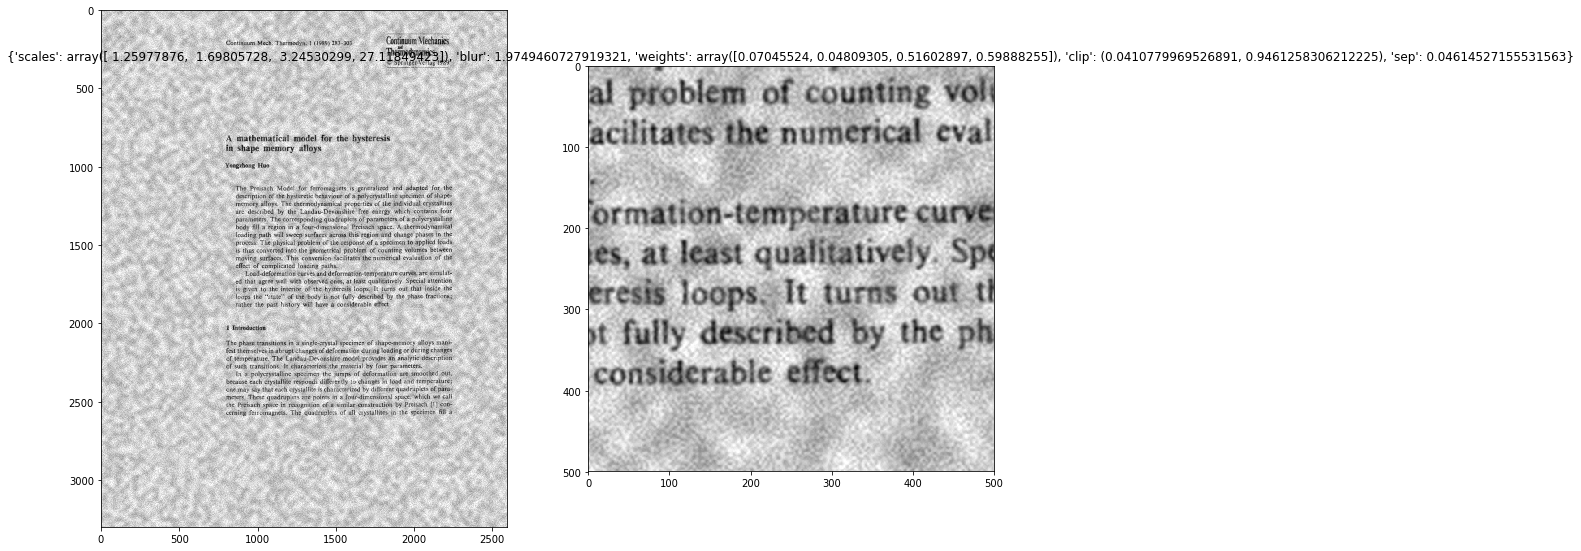

In [192]:
degraded, params = make_all_random(page)
subplot(121); imshow(degraded)
subplot(122); imshow(degraded[1500:2000, 1500:2000]); title(repr(params))

0 {'scales': array([ 1.51931125,  3.58862685,  6.3539965 , 21.51242538]), 'blur': 0.7174717721582993, 'weights': array([0.7800339 , 0.44412939, 0.35280665, 0.56135371]), 'clip': (0.1269080064423169, 0.9891208657846093), 'sep': 0.08084692614861516}
1 {'scales': array([1.4008458 , 1.94686408, 3.30762876, 6.02388451]), 'blur': 1.2749130823599266, 'weights': array([0.46606378, 0.75314097, 0.69702443, 0.85611951]), 'clip': (0.1497652847889764, 0.9594291548574948), 'sep': 0.07979591584205184}
2 {'scales': array([  5.24305464,  17.65912929, 143.42654951, 156.49912351]), 'blur': 0.5807615882365731, 'weights': array([0.69328999, 0.57368001, 0.47338271, 0.95653002]), 'clip': (0.13818267554822225, 0.8426139836446589), 'sep': 0.022894814666334876}
3 {'scales': array([ 7.5842051 ,  8.58922272, 25.28127997, 42.4846722 ]), 'blur': 1.5237628274765145, 'weights': array([0.45904647, 0.31680068, 0.16206617, 0.61732151]), 'clip': (0.0463830993361724, 0.9331607775783741), 'sep': 0.15705036648643828}
4 {'sc

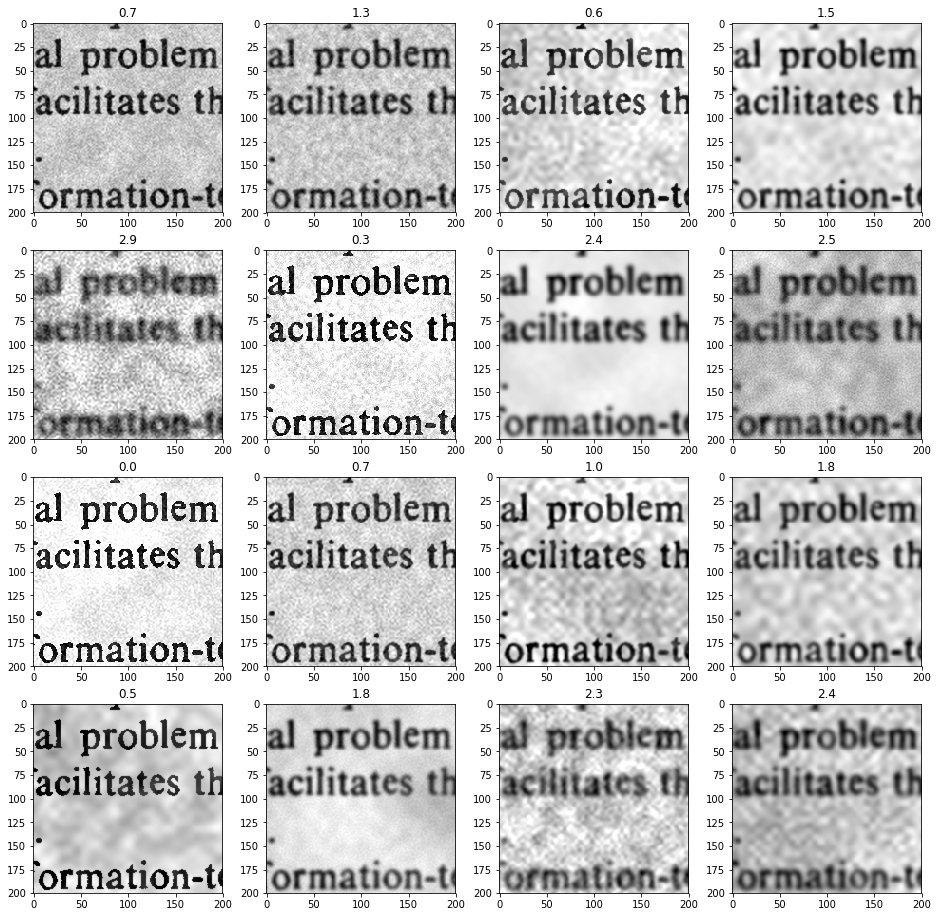

In [193]:
for i in range(16):
    degraded, params = make_all_random(page)
    subplot(4, 4, i+1)
    print i, params
    imshow(degraded[1500:1700, 1500:1700]); title("{:.1f}".format(params["blur"]))